In [2]:
import pandas as pd
import numpy as np
import os
os.chdir(r'C:\Users\edens\Documents\GitHub')
os.makedirs('smiles_data', exist_ok=True)
os.chdir('smiles_data')
data = [
    ("O=C1C=C(CCCCCCC)NC2=CC=CC=C21", 4.12498989),
    ("O=C1C=C(CCCCCCCCC)NC2=CC=CC=C21", 96.10123015),
    ("O=C1C=C(CCCCCCC)OC2=CC=CC=C21", 70.77410536),
    ("O=C1C=C(CCCCCCC)NC2=CC=C(C)C=C21", 31.44120271),
    ("O=C1C=C(CCCCCCC)NC2=CC=C(OC)C=C21", 29.08481711),
    ("O=C1C=C(CCCCCCC)NC2=CC(C)=CC(C)=C21", 53.66880496),
    ("O=C1C=C(CCCCC)NC2=CC=CC=C21", -2.4915766),
    ("O=C1C=C(CCC2=CC=CC=C2)NC3=CC=CC=C31", -3.8061877),
    ("O=C1C=C(CCC2CCCCC2)NC3=CC=CC=C31", 10.58612556),
    ("O=C1C=C(CCCCCCCCC#C)NC2=CC=CC=C21", 20.14217469),
    ("O=C1C=C(CCCCCCC)NC2=CC=C(F)C=C21", 18.76491528),
    ("O=C1C=C(CCCCCCC)NC2=C(F)C=CC=C21", 12.6076524),
    ("O=C1C=C(CCCCCCC)NC2=C(C)C=CC=C21", 16.40913086),
    ("O=C1C=C(CCCCCCC)NC2=C(Cl)C=C(Cl)C=C21", 2.94128625),
    ("O=C1C(C)=C(CCCCCCC)NC2=CC=CC=C21", 88.63912532),
    ("O=C1C(C=O)=C(CCCCCCC)NC2=CC=CC=C21", 47.09387042),
    ("O=C1C(I)=C(CCCCCCC)NC2=CC=CC=C21", 4.76236877),
    ("O=C1C(Br)=C(CCCCCCC)NC2=CC=CC=C21", 12.672004),
    ("O=C1NC(CCCCCCC)=CC2=CC=CC=C21", 22.44154814),
    ("O=C1C(O)=C(CCCCCCC)NC2=CC=CC=C21", 93.99734127),
    ("O=C1C(O)=C(CCCCCCC)NC2=CC=C(C)C=C21", 94.54389147),
    ("O=C1C(O)=C(CCCCCCCCC)NC2=CC=CC=C21", 93.54247143),
    ("O=C1C(O)=C(CCC2CCCCC2)NC3=CC=CC=C31", 94.76976081),
    ("O=C1C(O)=C(CCCCCCC)NC2=C(C)C=CC=C21", 96.33892275),
    ("O=C1C(O)=C(CCCCCCC)NC2=C(F)C=CC=C21", 94.71808415),
    ("O=C1C(O)=C(CCCCCCC)OC2=CC=CC=C21", 94.11013817),
    ("O=C1C(O)=C(CCCCCCCCC#C)NC2=CC=CC=C21", 90.33653956),
    ("O=C1C(O)=C(CCCCC)NC2=CC=CC=C21", 86.04988163),
    ("O=C1C(O)=C(CCCCCCC)NC2=CC(C)=CC(C)=C21", 83.37404259),
    ("O=C1C(O)=C(CCCCCCC)NC2=CC=C(OC)C=C21", 79.76208697),
    ("O=C1C(O)=C(C2=CC=CC=C2)NC3=CC=CC=C31", 72.92894447),
    ("O=C1C(O)=C(CCCCCCC)NC2=C(Cl)C=C(Cl)C=C21", 70.94058286),
    ("O=C1C(O)=C(CCC2=CC=CC=C2)NC3=CC=CC=C31", 60.85105925)
]

df = pd.DataFrame(data, columns=['SMILES', 'Output'])
import pandas as pd
import numpy as np

# Assuming you have the DataFrame as 'df' from the previous step:
R = 0.001987  # kcal·mol⁻¹·K⁻¹
T = 298.15    # K

def ee_to_ddg(ee_percent):
    ee_frac = ee_percent / 100
    # Avoid division by zero or log errors
    ee_frac = np.clip(ee_frac, -0.9999999, 0.9999999)
    ddg = -R * T * np.log((1 + ee_frac) / (1 - ee_frac))
    return ddg

# Convert 'Output' (ee%) to ΔΔG
df['ddG_kcal_mol'] = df['Output'].apply(ee_to_ddg)

# Save the new DataFrame to CSV
df.to_csv('molecules_ddg.csv', index=False)
print(df.head())



                              SMILES     Output  ddG_kcal_mol
0      O=C1C=C(CCCCCCC)NC2=CC=CC=C21   4.124990     -0.048903
1    O=C1C=C(CCCCCCCCC)NC2=CC=CC=C21  96.101230     -2.321100
2      O=C1C=C(CCCCCCC)OC2=CC=CC=C21  70.774105     -1.045798
3   O=C1C=C(CCCCCCC)NC2=CC=C(C)C=C21  31.441203     -0.385590
4  O=C1C=C(CCCCCCC)NC2=CC=C(OC)C=C21  29.084817     -0.354853


In [3]:
df = pd.read_csv("molecules_ddg.csv")
from rdkit import Chem
# Add molecule names
names = [
    "HHQ", "MD-28", "MD-87", "MD-61", "MD-66", "MD-74", "MD-24", "MD-25",
    "MD-37", "MD-106", "ME-18", "MD-71", "MD-75", "MD-77", "ME-27", "ME-1",
    "ME-2", "ME-10", "ME-17", "PQS", "MD-124", "MD-38", "MD-42", "MD-125",
    "ME-22", "MD-83", "MD-108", "MD-68", "ME-7", "ME-5", "MD-48", "ME-8", "MD-41"
]

df.insert(0, 'Name', names)
df["Mol"] = df["SMILES"].apply(Chem.MolFromSmiles)

In [8]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolAlign

# Ensure output directory exists
os.makedirs("xyz_files", exist_ok=True)

# Loop over DataFrame rows
for idx, row in df.iterrows():
    mol = row["Mol"]
    name = row["Name"]

    if mol is None:
        print(f"Skipping {name} due to invalid SMILES.")
        continue

    # Add hydrogens and embed 3D coordinates
    mol = Chem.AddHs(mol)
    success = AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    if success != 0:
        print(f"Embedding failed for {name}")
        continue

    # Optional: optimize geometry
    try:
        AllChem.UFFOptimizeMolecule(mol)
    except:
        print(f"Optimization failed for {name}")
        continue

    # Write to XYZ file
    conf = mol.GetConformer()
    with open(f"xyz_files/{name}.xyz", "w") as f:
        f.write(f"{mol.GetNumAtoms()}\n{name}\n")
        for atom in mol.GetAtoms():
            pos = conf.GetAtomPosition(atom.GetIdx())
            f.write(f"{atom.GetSymbol():<2} {pos.x:.5f} {pos.y:.5f} {pos.z:.5f}\n")

print("XYZ files saved to 'xyz_files/' directory.")


XYZ files saved to 'xyz_files/' directory.


In [10]:
def get_file_name_list(file_identifier):
    """
    The function gets a file identifier as input and returns a list of all files in the working 
    which contain the identifier in the files name
    ----------
    Parameters
    ----------
    identifier : str.
        The wanted file identifier like 'txt','info','nbo' contained in the filename
    -------
    Returns
    -------
    list
        A list of all files in the working directory with the chosen extension 
    --------
    Examples
    --------
    
    all_files_in_dir=listdir()
    print(all_files_in_dir)
        ['0_1106253-mod-mod.xyz', '0_1106253-mod.xyz', '1106253.cif', '1109098.cif', '1_1106253-mod.xyz', 'centered_0_BASCIH.xyz', 'cif_handler.py']
        
    xyz_files_in_dir=get_filename_list('.xyz')
    print(xyz_files_in_dir)
        ['0_1106253-mod-mod.xyz', '0_1106253-mod.xyz', '1_1106253-mod.xyz', 'centered_0_BASCIH.xyz']
  
    """
    return [filename for filename in os.listdir() if file_identifier in filename]

def split_strings(strings_list):
    split_list = []
    for string in strings_list:
        split_list.extend(string.split())
    return split_list

def get_df_from_file(filename,columns=['atom','x','y','z'],index=None):
    """
    Parameters
    ----------
    filename : str
        full file name to read.
    columns : str , optional
        list of column names for DataFrame. The default is None.
    splitter : str, optional
        input for [.split().] , for csv-',' for txt leave empty. The default is None.
    dtype : type, optional
        type of variables for dataframe. The default is None.

    Returns
    -------
    df : TYPE
        DESCRIPTION.

    """
    with open(filename, 'r') as f:
        lines=f.readlines()[2:]
    splitted_lines=split_strings(lines)
    df=pd.DataFrame(np.array(splitted_lines).reshape(-1,4),columns=columns,index=index)
    df[['x','y','z']]=df[['x','y','z']].astype(float)
    return df

In [ ]:
import os
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, RDKFingerprint

def xyz_to_mol(xyz_file):
    """
    Converts an XYZ file to an RDKit molecule using xyz2mol.
    If multiple molecules are returned, selects the first one.
    """
    from xyz2mol import xyz2mol
    
    try:
        # Read XYZ file and extract atoms & coordinates
        df = get_df_from_file(xyz_file)
        atoms = df['atom'].tolist()
        coords = df[['x', 'y', 'z']].values
        pt = Chem.GetPeriodicTable()
        atomic_numbers = [pt.GetAtomicNumber(atom) for atom in atoms]

        print(f"🔹 Converting {xyz_file} to molecule...")

        # Convert XYZ to mol
        mols = xyz2mol(atomic_numbers, coords)

        # Ensure at least one molecule was returned
        if not mols or len(mols) == 0:
            print(f"❌ ERROR: xyz2mol returned no molecules for {xyz_file}")
            return None

        mol = mols[0]  # Take the first molecule

        # **Sanitize and validate molecule**
        if mol is None:
            print(f"❌ ERROR: Conversion failed, RDKit mol is None for {xyz_file}")
            return None
        
        try:
            Chem.SanitizeMol(mol)
            print(f"✅ Molecule sanitized successfully for {xyz_file}")
        except Exception as e:
            print(f"⚠️ WARNING: RDKit molecule sanitization failed for {xyz_file}: {e}")
            return None

        return mol

    except Exception as e:
        print(f"❌ ERROR: Exception occurred while converting {xyz_file}: {e}")
        return None

def compute_fingerprints_for_directory(xyz_dir):
    """
    Iterates over all XYZ files in the given directory, converts each to an RDKit molecule,
    computes fingerprints, and returns a DataFrame with the results.
    
    Fingerprints computed:
      - RDKit fingerprint (RDKFingerprint)
      - Morgan fingerprint (radius=2, 2048 bits)
      - MACCS Keys (166-bit)
    
    Parameters:
        xyz_dir (str): Path to the directory containing XYZ files.
    
    Returns:
        pd.DataFrame: DataFrame with columns: filename, RDKFingerprint, MorganFingerprint, MACCSKeys.
    """
    results = []
    
    for filename in os.listdir(xyz_dir):
        if filename.lower().endswith('.xyz'):
            file_path = os.path.join(xyz_dir, filename)
            print(f"🔹 Processing {filename} ...")
            
            try:
                mol = xyz_to_mol(file_path)
                
                if mol is None:
                    print(f"❌ Skipping {filename}: Invalid or failed molecule conversion.")
                    continue
                
                # Compute fingerprints
                try:
                    rdkit_fp = RDKFingerprint(mol)
                    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
                    maccs_fp = MACCSkeys.GenMACCSKeys(mol)
                except Exception as e:
                    print(f"❌ ERROR: Failed to compute fingerprints for {filename}: {e}")
                    continue

                # Convert fingerprints to bit strings
                rdkit_fp_str = rdkit_fp.ToBitString()
                morgan_fp_str = morgan_fp.ToBitString()
                maccs_fp_str = maccs_fp.ToBitString()
                
                results.append({
                    'filename': filename,
                    'RDKFingerprint': rdkit_fp_str,
                    'MorganFingerprint': morgan_fp_str,
                    'MACCSKeys': maccs_fp_str
                })
                print(f"✅ {filename} processed successfully.")

            except Exception as e:
                print(f"❌ ERROR processing {filename}: {e}")
    
    df = pd.DataFrame(results)
    return df

if __name__ == '__main__':
    # Update the directory below with the path to your XYZ files
    xyz_directory = r'C:\Users\edens\Documents\GitHub\smiles_data\xyz_files'
    
    df_fps = compute_fingerprints_for_directory(xyz_directory)
    print("\n📊 **Fingerprint DataFrame:**")
    print(df_fps)


🔹 Processing HHQ.xyz ...
🔹 Converting C:\Users\edens\Documents\GitHub\smiles_data\xyz_files\HHQ.xyz to molecule...
✅ Molecule sanitized successfully for C:\Users\edens\Documents\GitHub\smiles_data\xyz_files\HHQ.xyz
✅ HHQ.xyz processed successfully.
🔹 Processing MD-106.xyz ...
🔹 Converting C:\Users\edens\Documents\GitHub\smiles_data\xyz_files\MD-106.xyz to molecule...
✅ Molecule sanitized successfully for C:\Users\edens\Documents\GitHub\smiles_data\xyz_files\MD-106.xyz
✅ MD-106.xyz processed successfully.
🔹 Processing MD-108.xyz ...
🔹 Converting C:\Users\edens\Documents\GitHub\smiles_data\xyz_files\MD-108.xyz to molecule...
✅ Molecule sanitized successfully for C:\Users\edens\Documents\GitHub\smiles_data\xyz_files\MD-108.xyz
✅ MD-108.xyz processed successfully.
🔹 Processing MD-124.xyz ...
🔹 Converting C:\Users\edens\Documents\GitHub\smiles_data\xyz_files\MD-124.xyz to molecule...
✅ Molecule sanitized successfully for C:\Users\edens\Documents\GitHub\smiles_data\xyz_files\MD-124.xyz
✅ MD-

In [12]:
df_fps.to_csv('xyz_fingerprints.csv', index=False)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

def preprocess_fingerprints(df):
    """
    Expands fingerprint bit strings into individual binary features.
    """
    df_expanded = df[['filename']].copy()  # Keep only the filename for reference
    
    # Expand RDKFingerprint
    rdk_expanded = pd.DataFrame(df['RDKFingerprint'].apply(lambda x: list(map(int, x))).to_list(),
                                columns=[f"RDK_{i}" for i in range(len(df['RDKFingerprint'][0]))])
    
    # Expand MorganFingerprint
    morgan_expanded = pd.DataFrame(df['MorganFingerprint'].apply(lambda x: list(map(int, x))).to_list(),
                                   columns=[f"Morgan_{i}" for i in range(len(df['MorganFingerprint'][0]))])

    # Expand MACCSKeys
    maccs_expanded = pd.DataFrame(df['MACCSKeys'].apply(lambda x: list(map(int, x))).to_list(),
                                  columns=[f"MACCS_{i}" for i in range(len(df['MACCSKeys'][0]))])

    # Merge expanded features
    df_expanded = pd.concat([df_expanded, rdk_expanded, morgan_expanded, maccs_expanded], axis=1)
    
    print(f"✅ Preprocessed fingerprints into {df_expanded.shape[1]-1} features.")
    return df_expanded

def apply_pca(data, n_components=2):
    """
    Performs PCA on fingerprint features.
    """
    features = data.iloc[:, 1:]  # Exclude the filename column
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(features_scaled)

    explained_var = pca.explained_variance_ratio_.sum() * 100
    print(f"✅ PCA reduced dimensions to {n_components} components, capturing {explained_var:.2f}% variance.")

    return pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(n_components)]), pca

def plot_pca_2d(pca_data, df_filenames):
    """
    Plots a 2D PCA projection.
    """
    plt.figure(figsize=(8,6))
    plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], alpha=0.6, c='blue', edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA Projection')
    
    # Annotate first few points for clarity
    for i in range(min(10, len(df_filenames))):
        plt.annotate(df_filenames[i], (pca_data.iloc[i, 0], pca_data.iloc[i, 1]), fontsize=9)
    
    plt.grid(True)
    plt.show()

def plot_pca_3d(pca_data, df_filenames):
    """
    Plots a 3D PCA projection if at least 3 components exist.
    """
    if pca_data.shape[1] < 3:
        print("⚠️ Not enough components for 3D plot. Skipping.")
        return

    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], pca_data.iloc[:, 2], alpha=0.6, c='red', edgecolors='k')

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA Projection')

    # Annotate first few points for clarity
    for i in range(min(10, len(df_filenames))):
        ax.text(pca_data.iloc[i, 0], pca_data.iloc[i, 1], pca_data.iloc[i, 2], df_filenames[i], size=8)

    plt.show()


In [14]:
ex_df=preprocess_fingerprints(df_fps)
print(ex_df.head())
indexes=ex_df['filename']

✅ Preprocessed fingerprints into 4263 features.
     filename  RDK_0  RDK_1  RDK_2  RDK_3  RDK_4  RDK_5  RDK_6  RDK_7  RDK_8  \
0     HHQ.xyz      1      1      1      1      1      1      1      1      1   
1  MD-106.xyz      1      1      1      1      1      1      1      1      1   
2  MD-108.xyz      1      0      1      1      1      1      1      1      1   
3  MD-124.xyz      1      0      1      1      1      1      1      1      1   
4  MD-125.xyz      1      0      1      1      1      1      1      1      1   

   ...  MACCS_157  MACCS_158  MACCS_159  MACCS_160  MACCS_161  MACCS_162  \
0  ...          0          0          0          1          1          1   
1  ...          0          0          0          0          1          1   
2  ...          1          0          1          0          1          1   
3  ...          1          0          1          1          1          1   
4  ...          1          0          1          1          1          1   

   MACCS_163  

In [15]:
pca_data, pca_model = apply_pca(ex_df, n_components=3)

✅ PCA reduced dimensions to 3 components, capturing 44.66% variance.


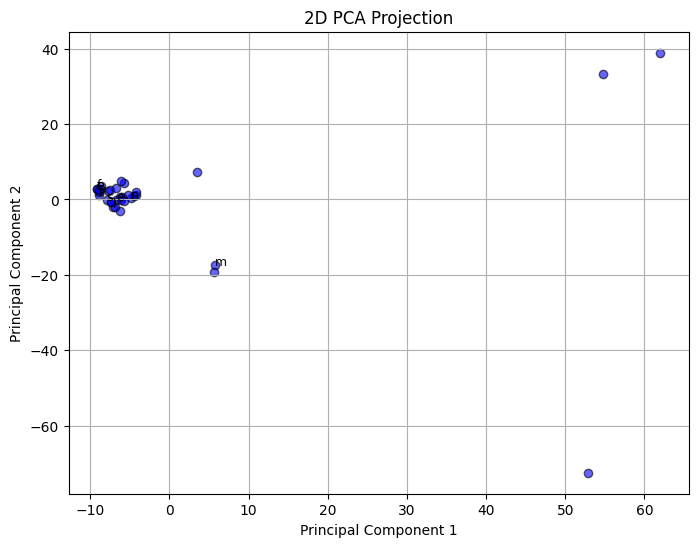

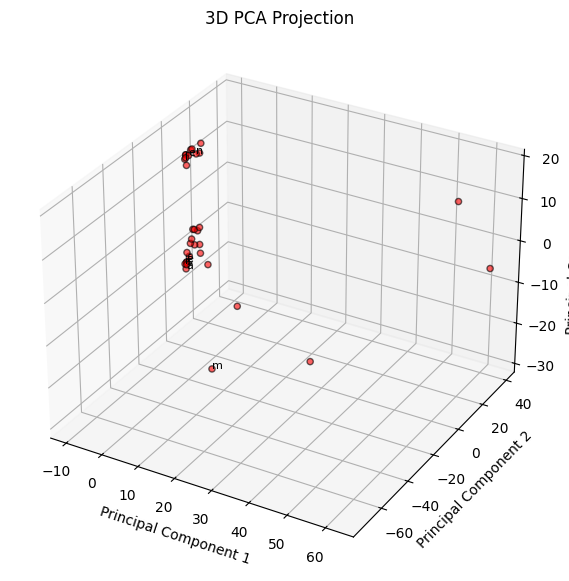

In [16]:
plot_pca_2d(pca_data, 'filenames')
plot_pca_3d(pca_data, 'filenames')

In [17]:
pca_data, pca_model = apply_pca(ex_df, n_components=20)

✅ PCA reduced dimensions to 20 components, capturing 96.68% variance.


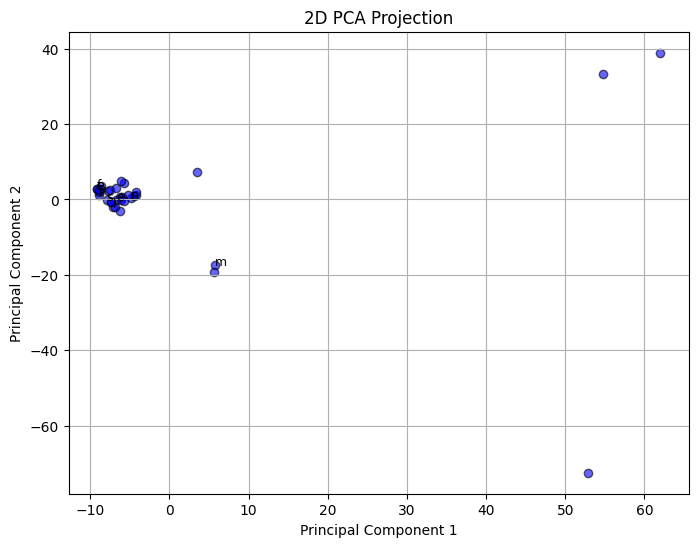

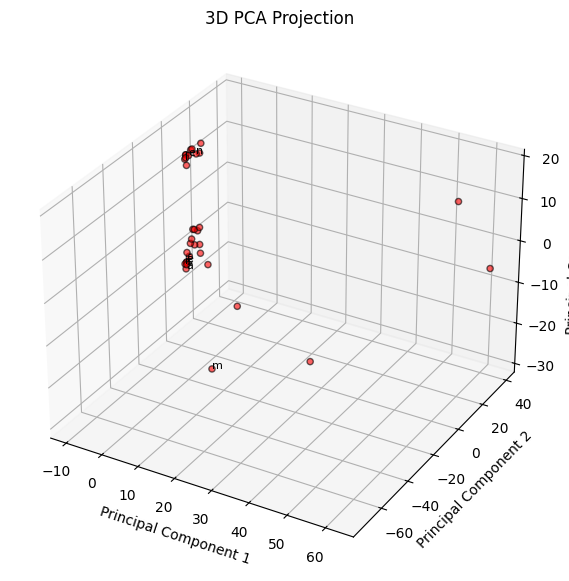

In [18]:
plot_pca_2d(pca_data, 'filenames')
plot_pca_3d(pca_data, 'filenames')

In [19]:
pca_data.index=indexes
pca_data.to_csv('pca_data_new1.csv')

['molecules_ddg.csv', 'pca_data_new1.csv', 'xyz_files', 'xyz_fingerprints.csv']

🔄 Training Fold 1...
Epoch 1/50
2/2 [==============================] - 1s 241ms/step - loss: 3.0793 - mae: 1.3753 - val_loss: 3.8195 - val_mae: 1.5687
Epoch 2/50
2/2 [==============================] - 0s 45ms/step - loss: 2.8206 - mae: 1.3278 - val_loss: 3.4593 - val_mae: 1.4813
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 2.5405 - mae: 1.2782 - val_loss: 3.1327 - val_mae: 1.3953
Epoch 4/50
2/2 [==============================] - 0s 48ms/step - loss: 2.1347 - mae: 1.1028 - val_loss: 2.8531 - val_mae: 1.3132
Epoch 5/50
2/2 [==============================] - 0s 54ms/step - loss: 1.6661 - mae: 0.9301 - val_loss: 2.6250 - val_mae: 1.2541
Epoch 6/50
2/2 [==============================] - 0s 52ms/step - loss: 1.7300 - mae: 1.0000 - val_loss: 2.4215 - val_mae: 1.2110
Epoch 7/50
2/2 [==============================] - 0s 38ms/step - loss: 1.3556 - mae: 0.9088 - val_loss: 2.2382 - val_mae: 1

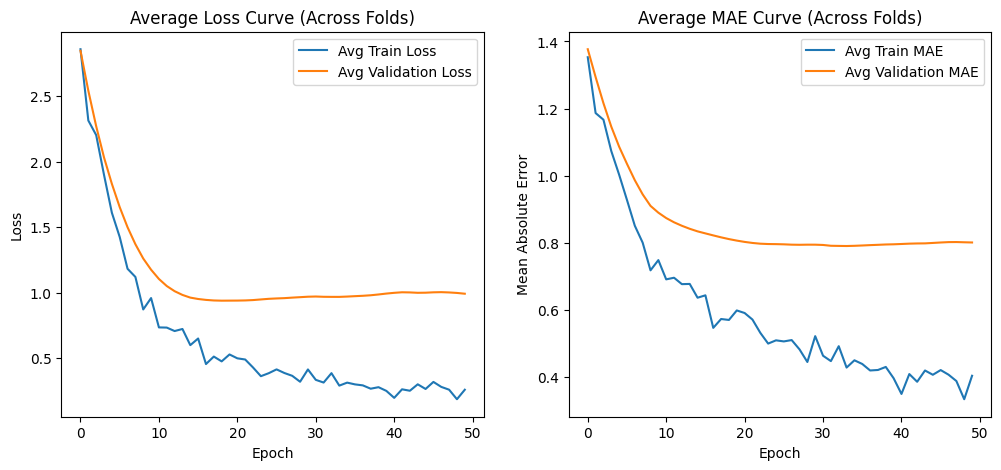

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
print(os.listdir())
# 🔹 Load Data
df_pca = pd.read_csv("pca_data_new1.csv")  # PCA Data
# df_y = pd.read_csv("y_values.csv")         # Target Values
df_pca.drop('filename', axis=1, inplace=True)  # Drop unnecessary column
# drop first column
# df_pca.drop('Unnamed: 0', axis=1, inplace=True)
df_y=df_pca['output']
df_pca.drop('output', axis=1, inplace=True)
# 🔹 Convert to numpy
X = df_pca.to_numpy()
y = df_y.to_numpy().flatten()  

# 🔹 Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 🔹 Leave some data for external validation (e.g., 10%)
X_trainval, X_test_ext, y_trainval, y_test_ext = train_test_split(X, y, test_size=0.1, random_state=42)

# 🔹 Define KFold Cross-Validation (Only on Training+Validation Set)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
all_histories = []
all_mae_scores = []

# 🔹 Cross-Validation Loop
for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\n🔄 Training Fold {fold+1}...")
    
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    # 🔹 Define Model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])

    # 🔹 Compile Model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    # 🔹 Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=120, restore_best_weights=True, verbose=1)

    # 🔹 Train Model
    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=16,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping],
                        verbose=1)

    # Store history
    all_histories.append(history.history)
    
    # 🔹 Evaluate on Validation Set
    loss, mae = model.evaluate(X_val, y_val, verbose=0)
    all_mae_scores.append(mae)
    print(f"✅ Fold {fold+1} Validation MAE: {mae:.4f}")

# 🔹 Final Cross-Validation Results
mean_mae = np.mean(all_mae_scores)
std_mae = np.std(all_mae_scores)
print(f"\n📊 Cross-Validation Results:")
print(f"Mean Validation MAE: {mean_mae:.4f}")
print(f"Std Dev MAE: {std_mae:.4f}")

# 🔹 External Test Set Evaluation
loss_ext, mae_ext = model.evaluate(X_test_ext, y_test_ext, verbose=0)
print(f"\n🛠️ Final Model Performance on External Test Set:")
print(f"✅ External Test MAE: {mae_ext:.4f}")

# 🔹 Plot Training History (Averaged)
epochs = range(len(all_histories[0]['loss']))
avg_loss = np.mean([h['loss'] for h in all_histories], axis=0)
avg_val_loss = np.mean([h['val_loss'] for h in all_histories], axis=0)
avg_mae = np.mean([h['mae'] for h in all_histories], axis=0)
avg_val_mae = np.mean([h['val_mae'] for h in all_histories], axis=0)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, avg_loss, label='Avg Train Loss')
plt.plot(epochs, avg_val_loss, label='Avg Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Loss Curve (Across Folds)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, avg_mae, label='Avg Train MAE')
plt.plot(epochs, avg_val_mae, label='Avg Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Average MAE Curve (Across Folds)')
plt.legend()

plt.show()


In [9]:
import numpy as np


# Extract weights from the first hidden layer
weights = model.layers[0].get_weights()[0]  # First layer weights

# Compute absolute importance (sum of absolute weights for each feature)
feature_importance = np.sum(np.abs(weights), axis=1)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]

# Print the top N important features
top_n = 10  # Change this if you want more
print("\n🔹 Top Feature Importances:")
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {sorted_importance[i]:.4f}")



🔹 Top Feature Importances:
Feature 10: Importance 9.7550
Feature 0: Importance 8.9467
Feature 7: Importance 8.9258
Feature 17: Importance 8.8886
Feature 15: Importance 8.8361
Feature 5: Importance 8.8014
Feature 1: Importance 8.7758
Feature 18: Importance 8.7338
Feature 16: Importance 8.5159
Feature 6: Importance 8.4115


In [1]:
import os
os.chdir(r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M2_data_extractor')
from sterimol_standalone import Molecules_xyz

In [3]:
path=r'C:\Users\edens\Documents\GitHub\smiles_data\xyz_files_renumbered-04-16-25-13-05'

mols= Molecules_xyz(path)
df=mols.get_sterimol_df([[17,18], [28,16], [5,6], [12,5], [2,3], [14,13]])

           B1      B5        L   loc_B5  B1_B5_angle
17-18  1.7099  5.0975  12.9218  11.3740     107.8605
28-16  1.7091  6.3238  14.6920  13.1312     103.6587
5-6    1.6991  5.4055   8.6745   7.0459     103.6789
12-5   1.6994  6.7277   9.5621   6.8764      97.2704
2-3    1.6992  5.6441  10.7541  -2.5481      91.9545
           B1       B5        L   loc_B5  B1_B5_angle
17-18  1.7072  11.1743  10.3702   8.7322     176.3653
28-16  1.7058  11.3300  12.1491  10.5039     169.4548
5-6    1.6991  11.0699   6.2540   4.7915     172.4479
12-5   1.6994  11.7530   5.3341   4.3195     159.0449
2-3    1.6992  11.1513   8.2693   6.6079     179.9286
           B1      B5        L   loc_B5  B1_B5_angle
17-18  1.7103  6.3860  13.2357   9.9219     147.8778
28-16  1.7092  6.1143  15.0095  10.3112     159.4067
5-6    1.6991  6.1559   8.9118   6.1339     177.0035
12-5   1.6997  9.0428   8.2055   3.5069     111.6990
2-3    1.6992  6.9485  11.1010   7.8918     142.3416
           B1      B5        L  loc_B5  

In [ ]:
df.to_csv('sterimol_data.csv')

: 